In [1]:
import numpy as np
import matplotlib.pyplot as pl
import cv2 as cv

In [7]:
rgb = cv.imread ('test.png')

In [8]:
rgb.shape

(225, 225, 3)

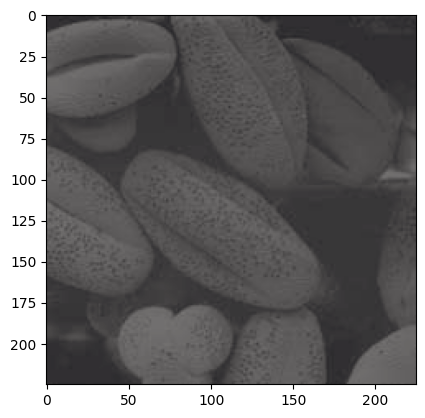

In [9]:
pl.imshow (rgb)

In [10]:
gray0 = cv.cvtColor (rgb, cv.COLOR_RGB2GRAY)

In [11]:
gray0.shape

(225, 225)

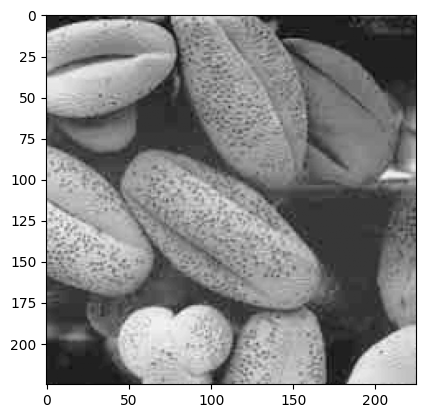

In [14]:
pl.imshow (gray0, cmap = 'gray')

In [15]:
np.min (gray0)

np.uint8(38)

In [16]:
np.max (gray0)

np.uint8(117)

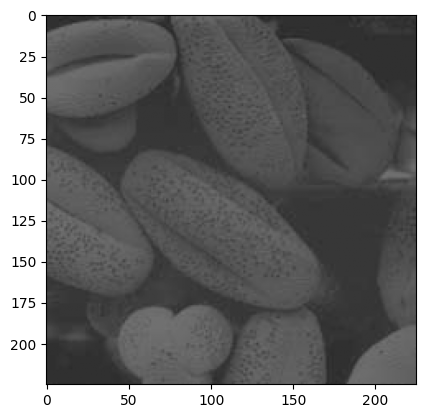

In [17]:
gray1 = np.copy (gray0)
gray1 [0, 0] = 0
gray1 [0, 1] = 255
pl.imshow (gray1, cmap = 'gray')

In [18]:
u0 = np.unique (gray0, return_counts = True)
u0

(array([ 38,  40,  41,  42,  43,  45,  46,  47,  48,  50,  51,  52,  53,
         54,  55,  57,  58,  59,  61,  62,  63,  64,  66,  67,  68,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
        110, 111, 112, 113, 114, 115, 117], dtype=uint8),
 array([   3,    4,    8,   18,   36,   72,  135,  290, 2373,  453,  431,
         624,  577, 1596, 3254, 1144, 1006,  854,  816,  656,  671,  604,
         599,  624,  603,  562,  583,  620,  784,  813,  867,  957, 1210,
        1919,  951,  957, 1007, 1069, 1040, 1065, 1040, 1050, 1077, 2072,
         914,  960,  915,  823,  840,  825,  688,  676,  611, 1124,  487,
         431,  442,  369,  673,  346,  334,  581,  289,  291,  462,  143,
         104,  157,   25,    7,   13,    1]))

In [19]:
a = np.zeros ((10))
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
a [[2, 3, 5, 7]] = [20, 30, 50, 70]
a

array([ 0.,  0., 20., 30.,  0., 50.,  0., 70.,  0.,  0.])

0.0 3254.0


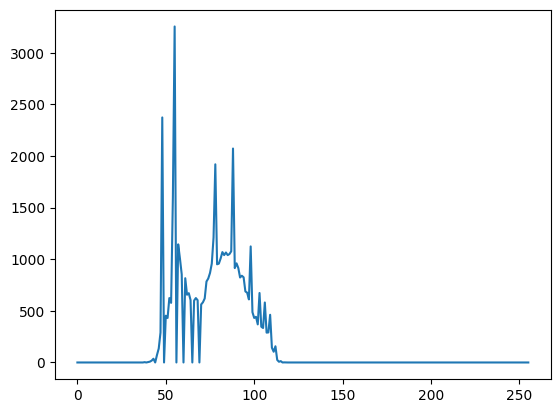

In [23]:
h = np.zeros ((256))
h [u0 [0]] = u0 [1]
print (np.min (h), np.max (h))
pl.plot (h)

0.0 50625.0 50625


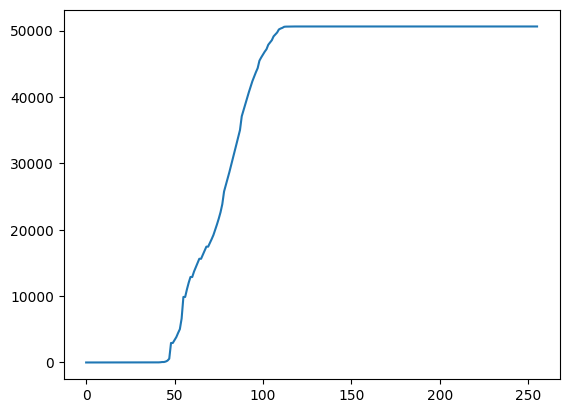

In [24]:
H0 = np.cumsum (h)
m, n = gray0.shape
print (np.min (H0), np.max (H0), m * n)
pl.plot (H0)

0.0 1.0


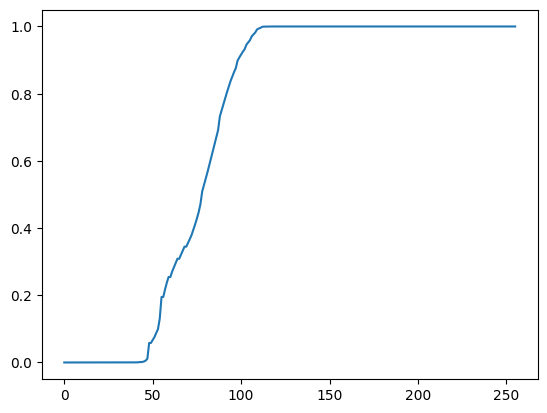

In [25]:
H1 = H0 / np.max (H0)
pl.plot (H1)
print (np.min (H1), np.max (H1))

0 255


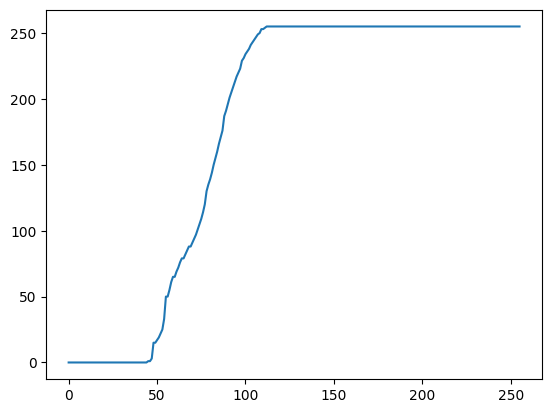

In [26]:
H = np.round (255 * H1, 0) .astype (int)
pl.plot (H)
print (np.min (H), np.max (H))

0 255


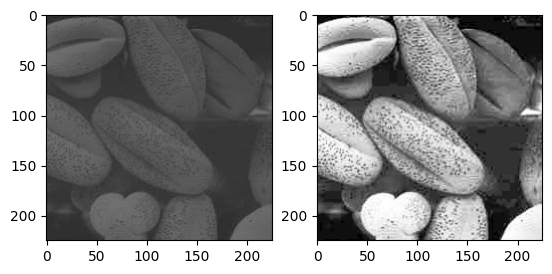

In [27]:
eq = H [gray0]
print (np.min (eq), np.max (eq))
pl.subplot (1, 2, 1)
pl.imshow (gray1, cmap = 'gray')
pl.subplot (1, 2, 2)
pl.imshow (eq, cmap = 'gray')

In [28]:
ueq = np.unique (eq, return_counts = True)
ueq

(array([  0,   1,   3,  15,  17,  19,  22,  25,  33,  50,  55,  61,  65,
         69,  72,  76,  79,  82,  85,  88,  91,  94,  97, 101, 105, 109,
        114, 120, 130, 135, 139, 144, 150, 155, 160, 166, 171, 176, 187,
        191, 196, 201, 205, 209, 213, 217, 220, 223, 229, 231, 234, 236,
        238, 241, 243, 245, 247, 249, 250, 253, 254, 255]),
 array([  69,  207,  290, 2373,  453,  431,  624,  577, 1596, 3254, 1144,
        1006,  854,  816,  656,  671,  604,  599,  624,  603,  562,  583,
         620,  784,  813,  867,  957, 1210, 1919,  951,  957, 1007, 1069,
        1040, 1065, 1040, 1050, 1077, 2072,  914,  960,  915,  823,  840,
         825,  688,  676,  611, 1124,  487,  431,  442,  369,  673,  346,
         334,  581,  289,  291,  605,  104,  203]))

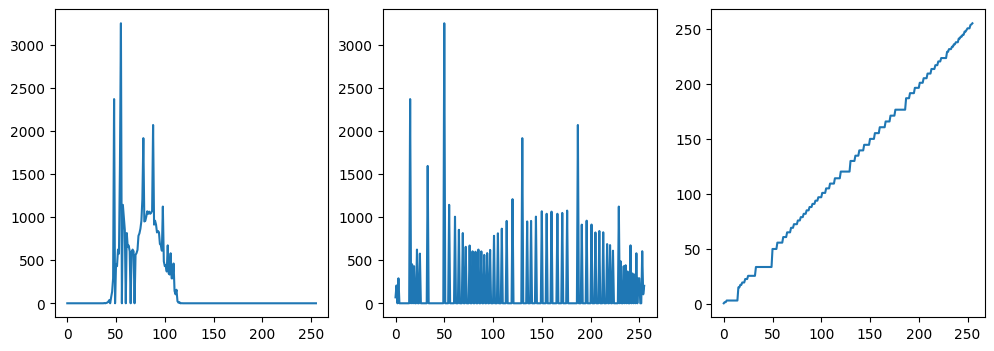

In [30]:
heq = np.zeros ((256))
heq [ueq [0]] = ueq [1]
Heq = np.cumsum (heq)

pl.figure (figsize = (12, 4))
pl.subplot (1, 3, 1); pl.plot (h)
pl.subplot (1, 3, 2); pl.plot (heq)
pl.subplot (1, 3, 3); pl.plot (Heq / m / n * 255)

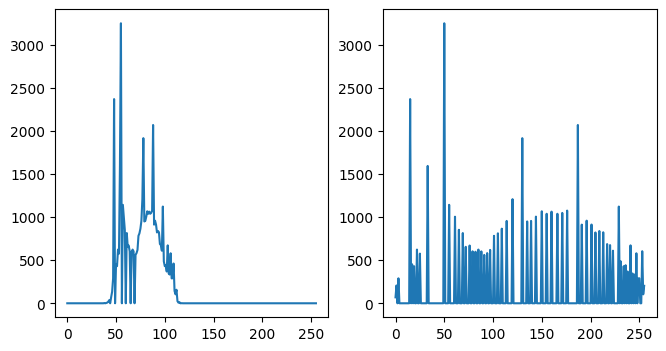

In [31]:
Hist = cv.calcHist ([gray0], channels = [0], histSize = [256], mask = None, ranges = [0, 256])
Eq = cv.equalizeHist (gray0)
Hist2 = cv.calcHist ([Eq], channels = [0], histSize = [256], mask = None, ranges = [0, 256])

pl.figure (figsize = (12, 4))
pl.subplot (1, 3, 1)
pl.plot (Hist)
pl.subplot (1, 3, 2)
pl.plot (Hist2)

In [32]:
print (np.max (np.abs (Hist - np.array([h]).T)))
print (np.max (np.abs (Hist2 - np.array([heq]).T)))

0.0
0.0
